In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import chardet
with open('spam.csv', 'rb') as rawdata:
    result = chardet.detect(rawdata.read(100000))
result

{'encoding': 'Windows-1252', 'confidence': 0.7270322499829184, 'language': ''}

In [3]:
df=pd.read_csv('spam.csv', encoding='Windows-1252')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3077,ham,Okay but i thought you were the expert,NaN,NaN,NaN
2717,ham,Okie.. Thanx..,NaN,NaN,NaN
1116,ham,Hey... What time is your driving on fri? We go...,NaN,NaN,NaN
3224,ham,I need... Coz i never go before,NaN,NaN,NaN
3925,ham,I havent add Ì_ yet right..,NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

Steps:
1. Data Cleaning
2. EDA
3. Text preprocessing
4. Model Building
5. Evaluation
6. Improvements
7. Website Building
8. Deploy

## Data Cleaning

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
# drop last 3 col
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'], inplace=True)
df.sample(5)

,v1,v2
204,ham,U call me alter at 11 ok.
2114,spam,Sunshine Hols. To claim ur med holiday send a ...
4401,ham,Good FRIENDS CaRE for each Other.. CLoSE Frien...
870,ham,"Well am officially in a philosophical hole, so..."
768,ham,I cant pick the phone right now. Pls send a me...


In [7]:
# renaming the columns
df.rename(columns={'v1':'Label', 'v2':'Text'}, inplace=True)
df.sample(5)

,Label,Text
930,ham,I'm really sorry i won't b able 2 do this frid...
1093,ham,Well the weather in cali's great. But its comp...
1268,spam,Can U get 2 phone NOW? I wanna chat 2 set up m...
4082,ham,"Good afternoon, my love. It was good to see yo..."
1859,ham,What's up. Do you want me to come online?


In [8]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [9]:
df['Label']=encoder.fit_transform(df['Label'])

In [10]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
## check missing values
df.isnull().sum()

Label    0
Text     0
dtype: int64

In [12]:
## Check for duplicate values
df.duplicated().sum()

403

In [13]:
df.drop_duplicates(keep='first', inplace=True)

In [14]:
df.shape

(5169, 2)

## EDA

In [15]:
df.head()

,Label,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [16]:
df['Label'].value_counts()

0    4516
1     653
Name: Label, dtype: int64

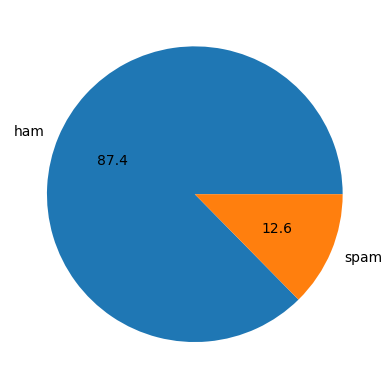

In [17]:
plt.pie(df['Label'].value_counts(), labels=['ham','spam'], autopct="%0.1f")
plt.show()

This pie chart shows that 87.4% of text/messages are ham (not spam) and remaining 12.6% are spam. Hence the data is imbalanced for Model Building

In [18]:
import nltk

In [19]:
!pip install nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters']=df['Text'].apply(len)
df.head()

,Label,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# number of words
df['num_words'] = df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Label,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [23]:
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [24]:
df['num_sentences'] = df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Label,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [25]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.453279,1.947185
std,58.236293,13.324793,1.362406
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,28.000000


In [26]:
## Ham messages description
df[df['Label']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.120903,1.799601
std,56.358207,13.493725,1.278465
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,28.000000


In [27]:
## Spam messages description
df[df['Label']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.967841
std,30.137753,7.008418,1.483201
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,8.000000


### Plotting Histograms

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

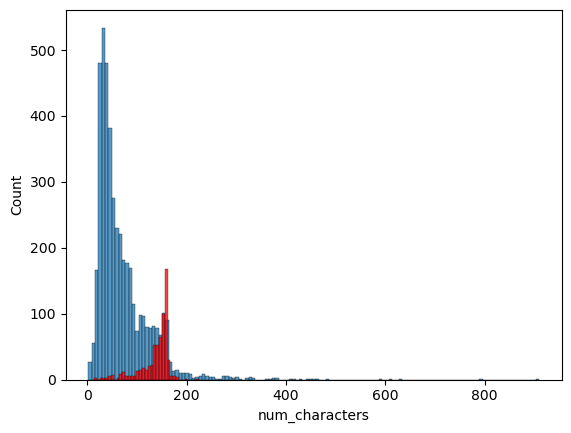

In [28]:
## for number of characters
sns.histplot(df[df['Label']==0]['num_characters'])
sns.histplot(df[df['Label']==1]['num_characters'], color='red')

<AxesSubplot:xlabel='num_words', ylabel='Count'>

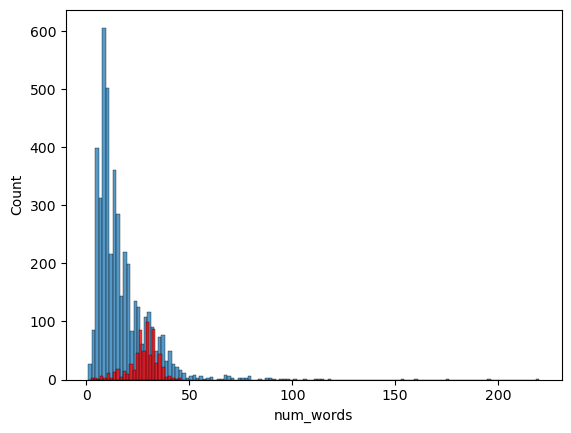

In [29]:
## for number of words
sns.histplot(df[df['Label']==0]['num_words'])
sns.histplot(df[df['Label']==1]['num_words'], color='red')

<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

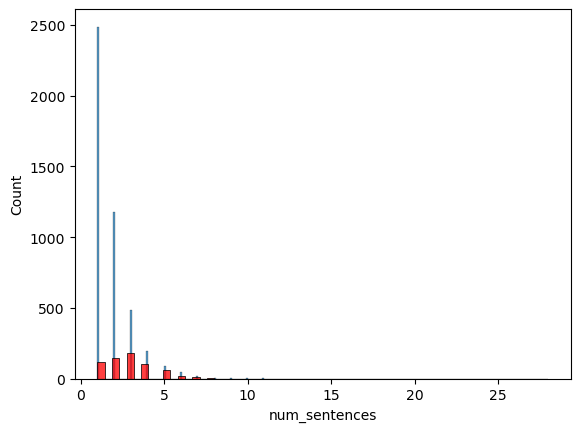

In [30]:
## for number of words
# plt.figure(figsize=(8,3))
sns.histplot(df[df['Label']==0]['num_sentences'])
sns.histplot(df[df['Label']==1]['num_sentences'], color='red')

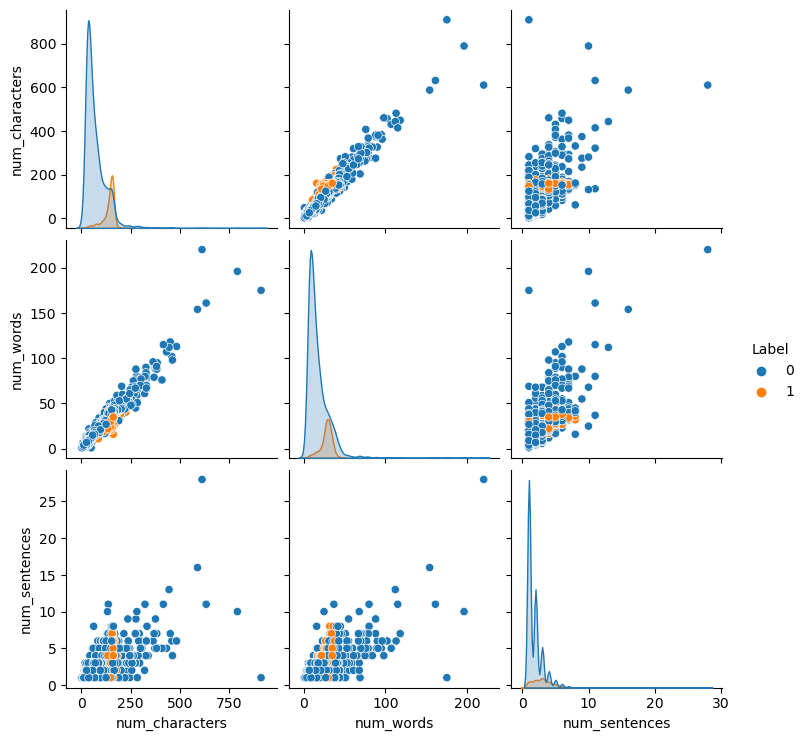

In [31]:
sns.pairplot(df,hue='Label')

<AxesSubplot:>

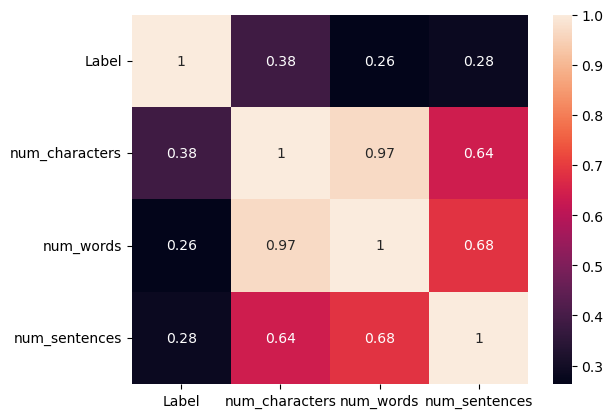

In [32]:
sns.heatmap(df.corr(),annot=True)

As we can see in the heatmap that num_characters has a higher covariance with Label compared to num_words and num_sentences.

## 3. Text Preprocessing

-> Lower Case<br>
-> Tokenization<br>
-> Removing stop words and punctuation<br>
-> Stemming<br>

In [33]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ASUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [34]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [35]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('firing')

'fire'

In [36]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return " ".join(y)

In [42]:
df['Text'][9]

'Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030'

In [43]:
transform_text('Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030')

'mobil 11 month u r entitl updat latest colour mobil camera free call mobil updat co free 08002986030'

In [44]:
df['transformed_text'] = df['Text'].apply(transform_text)

In [45]:
df.head()

,Label,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [46]:
!pip3 install wordcloud

In [47]:
from wordcloud.wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [48]:
spam_wc=wc.generate(df[df['Label']==1]['transformed_text'].str.cat(sep=" "))

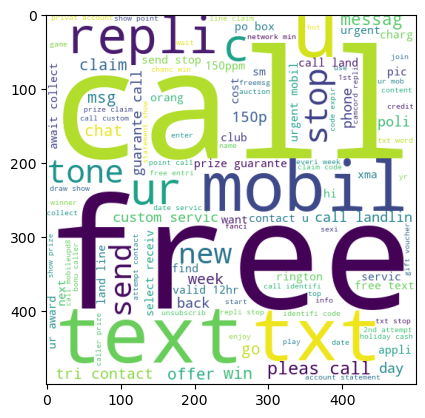

In [49]:
plt.imshow(spam_wc)

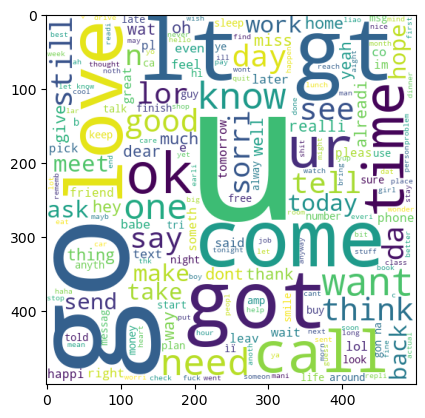

In [50]:
ham_wc=wc.generate(df[df['Label']==0]['transformed_text'].str.cat(sep=" "))
plt.imshow(ham_wc)

In [51]:
df.head()

,Label,Text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


#### Analysis on most common used words in spam messages

In [52]:
spam_corpus=[]
for msg in df[df['Label']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [53]:
len(spam_corpus)

9939

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


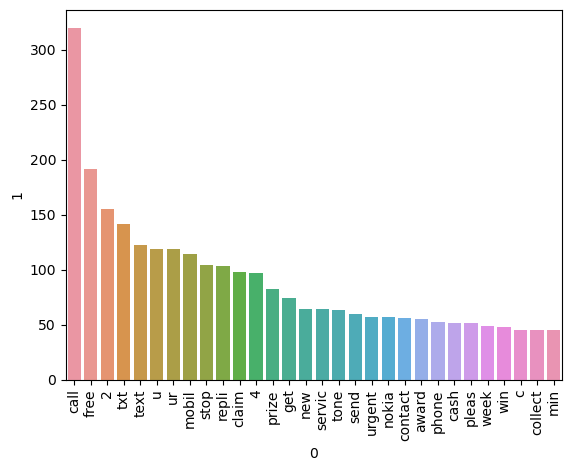

In [54]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(30))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

#### Analysis on most common used words in ham messages

In [55]:
ham_corpus=[]
for msg in df[df['Label']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [56]:
len(ham_corpus)

35394

C:\Users\ASUS\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


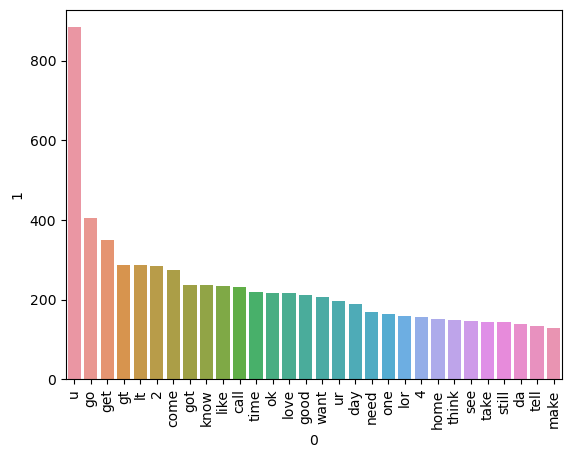

In [57]:
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [58]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [59]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [94]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

In [ ]:
# appending the num_character col to x
# X = np.hstack((X,df['num_characters'].value.reshape(-1,1)))

In [60]:
X.shape

(5169, 3000)

In [61]:
y = df['Label'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [62]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [63]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [64]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [99]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8723404255319149
[[782 114]
 [ 18 120]]
0.5128205128205128


In [65]:
(mnb.fit(X_train,y_train))
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [101]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [64]:
## tfidf --> mnb

In [65]:
!pip3 install xgboost

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [102]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [103]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [104]:
def train_classifier(clf, X_train, X_test, y_train, y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [105]:
train_classifier(knc,X_train,X_test,y_train,y_test)

(0.9052224371373307, 0.9761904761904762)

In [106]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    print("For", name)
    print("Accuracy score:", current_accuracy)
    print("Precision score:", current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For SVC
Accuracy score: 0.9661508704061895
Precision score: 0.9256198347107438
For KN
Accuracy score: 0.9052224371373307
Precision score: 0.9761904761904762
For NB
Accuracy score: 0.9787234042553191
Precision score: 0.9461538461538461
For DT
Accuracy score: 0.9274661508704062
Precision score: 0.8118811881188119
For LR
Accuracy score: 0.9671179883945842
Precision score: 0.9642857142857143
For RF
Accuracy score: 0.9748549323017408
Precision score: 0.9827586206896551
For AdaBoost
Accuracy score: 0.960348162475822
Precision score: 0.9292035398230089
For BgC
Accuracy score: 0.9574468085106383
Precision score: 0.8671875
For ETC
Accuracy score: 0.9748549323017408
Precision score: 0.9745762711864406
For GBDT
Accuracy score: 0.9477756286266924
Precision score: 0.92
For xgb
Accuracy score: 0.971953578336557
Precision score: 0.943089430894309


In [72]:
df1 = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by=['Precision', 'Accuracy'], ascending=[False,False])

In [73]:
df1

,Algorithm,Accuracy,Precision
5,RF,0.973888,1.000000
2,NB,0.959381,1.000000
1,KN,0.900387,1.000000
8,ETC,0.975822,0.982906
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.969052,0.934426
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [74]:
## improving model
## 1. Change the max_features parameter of TfIdf

In [91]:
df2 = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values(by=['Precision_max_ft_3000', 'Accuracy_max_ft_3000'], ascending=[False,False])
df2

,Algorithm,Accuracy_max_ft_3000,Precision_max_ft_3000
2,NB,0.970986,1.000000
1,KN,0.905222,1.000000
5,RF,0.974855,0.982759
0,SVC,0.975822,0.974790
8,ETC,0.974855,0.974576
4,LR,0.958414,0.970297
10,xgb,0.971954,0.943089
6,AdaBoost,0.960348,0.929204
9,GBDT,0.947776,0.920000
7,BgC,0.957447,0.867188


In [107]:
new_df = df1.merge(df2, on='Algorithm')

In [108]:
df3 = pd.DataFrame({'Algorithm': clfs.keys(),'Accuracy_Scaling':accuracy_scores,'Precision_Scaling':precision_scores}).sort_values(by=['Precision_Scaling', 'Accuracy_Scaling'], ascending=[False,False])

In [109]:
new_df_scaled = new_df.merge(df3, on='Algorithm')
new_df_scaled

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000,Accuracy_Scaling,Precision_Scaling
0,RF,0.973888,1.000000,0.974855,0.982759,0.974855,0.982759
1,NB,0.959381,1.000000,0.970986,1.000000,0.978723,0.946154
2,KN,0.900387,1.000000,0.905222,1.000000,0.905222,0.976190
3,ETC,0.975822,0.982906,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.966151,0.925620
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204
6,LR,0.951644,0.940000,0.958414,0.970297,0.967118,0.964286
7,xgb,0.969052,0.934426,0.971954,0.943089,0.971954,0.943089
8,GBDT,0.952611,0.923810,0.947776,0.920000,0.947776,0.920000
9,BgC,0.958414,0.862595,0.957447,0.867188,0.957447,0.867188


So after reviewing the table, we conclude that Scaling hasn't improved the models' Accuracy and Precision. Hence we will only use max_features = 3000 in TfIDF because it has improved models' Accuracy and Precision. 

In [110]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [111]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [112]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [113]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9606299212598425


In [114]:
# Applying stacking
estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
final_estimator=RandomForestClassifier()


In [115]:
from sklearn.ensemble import StackingClassifier
clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [116]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9398496240601504


In [67]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))